In [1]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))
sys.path.append(os.path.abspath(os.path.join('../..')))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def plot_loss_from_csv(csv_file):
    # Step 1: Load the data
    loss_monitor = pd.read_csv(csv_file)

    # Step 2: Group entries with the same bin_name
    grouped_losses = {}
    grouped_mses = {}
    grouped_mses_prop = {}

    for _, entry in loss_monitor.iterrows():
        bin_name = entry['val_noise']  # Get the bin name
        if bin_name not in grouped_losses:
            grouped_losses[bin_name] = []
            grouped_mses[bin_name] = []
            grouped_mses_prop[bin_name] = []
        
        grouped_losses[bin_name].append((entry['step'], entry['loss']))
        grouped_mses[bin_name].append((entry['step'], entry['loss_mse']))
        grouped_mses_prop[bin_name].append((entry['step'], entry['loss_mse_prop']))

    # Step 3: Create a subplot for loss
    plt.figure(figsize=(21, 6))

    # Subplot for Validation Loss
    plt.subplot(1, 3, 1)
    for bin_name, losses in grouped_losses.items():
        steps, loss_values = zip(*losses)  # Unzip steps and loss values
        plt.plot(steps, loss_values, marker='o', label=bin_name)  # Plot each bin
        
    plt.title("Validation Loss Across Bins Over Steps")
    plt.xlabel("Training Steps")
    plt.ylabel("Average Validation Loss")
    plt.grid()
    plt.xticks(rotation=45)
    plt.legend()

    # Step 4: Create a subplot for MSE
    plt.subplot(1, 3, 2)
    for bin_name, mses in grouped_mses.items():
        steps, mse_values = zip(*mses)  # Unzip steps and MSE values
        plt.plot(steps, mse_values, marker='o', label=bin_name)  # Plot each bin
        
    plt.title("MSE Across Bins Over Steps")
    plt.xlabel("Training Steps")
    plt.ylabel("Average MSE Loss")
    plt.ylim((0, 0.002))
    plt.grid()
    plt.xticks(rotation=45)
    plt.legend()

    # Step 5: Create a subplot for MSE Prop
    plt.subplot(1, 3, 3)
    for bin_name, mses_prop in grouped_mses_prop.items():
        steps, mse_prop_values = zip(*mses_prop)  # Unzip steps and MSE prop values
        plt.plot(steps, mse_prop_values, marker='o', label=bin_name)  # Plot each bin
        
    plt.title("MSE Prop Across Bins Over Steps")

    plt.xlabel("Training Steps")
    plt.ylabel("Average MSE Loss")
    plt.ylim(0,1)
    plt.grid()
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"{os.path.dirname(csv_file)}/LPN_loss.png", dpi=300, bbox_inches="tight")
    plt.show()

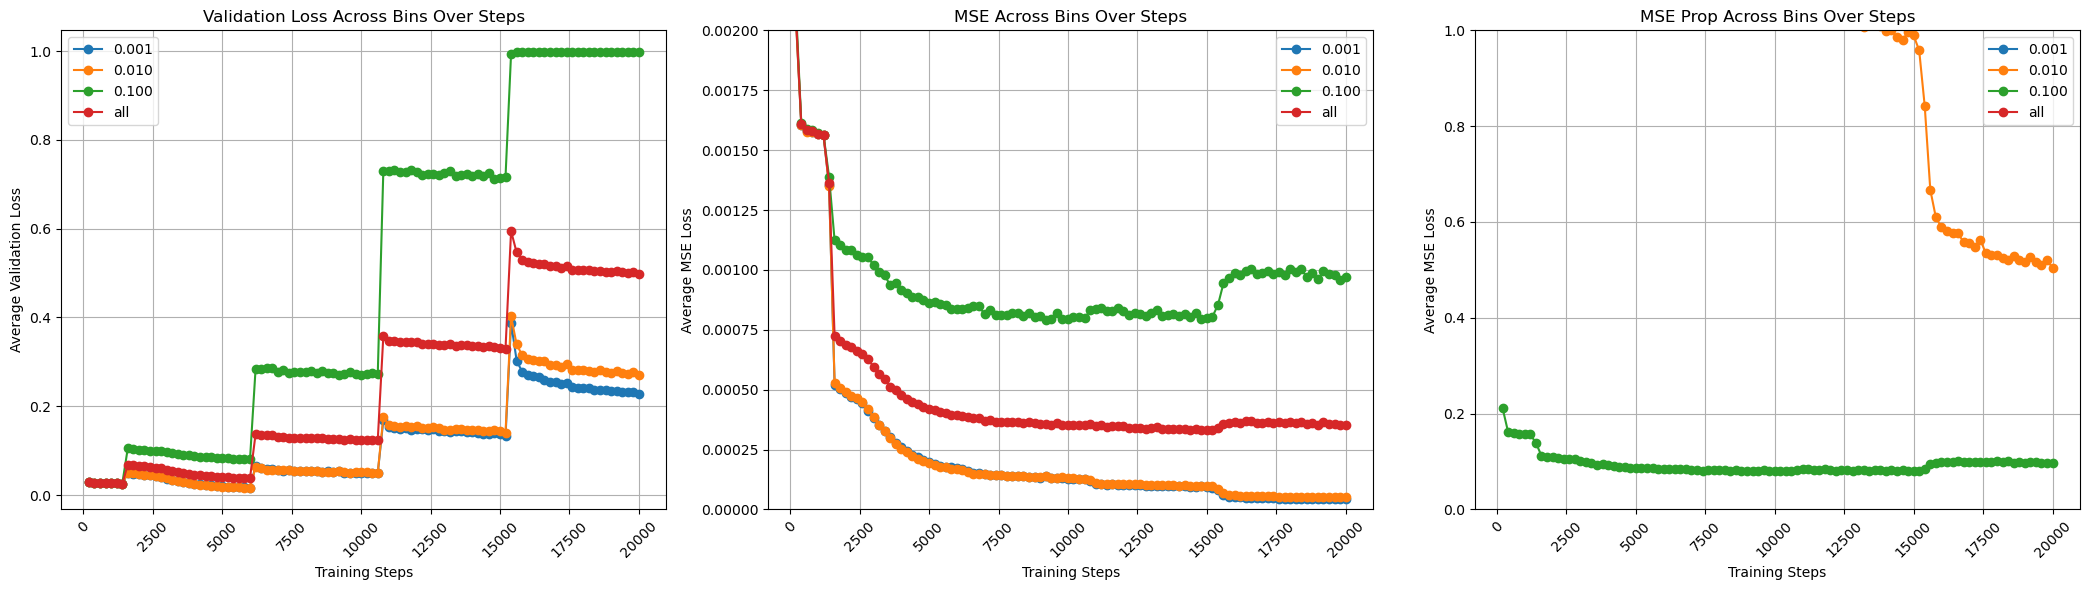

In [17]:
loss_csv = f'../weights/lpn_cond_mrs_h_30_k_3_n_(0.001_0.1)/LPN_loss.csv'
plot_loss_from_csv(loss_csv)

In [5]:
from lpn_mrs.networks.lpn_cond import sigma_encoding
import torch

In [6]:
sigma_values = torch.tensor([0.001, 0.01, 0.1])
d_model = 512  # Dimension of the output vector

# Compute positional encodings
positional_encodings = sigma_encoding(sigma_values, d_model)

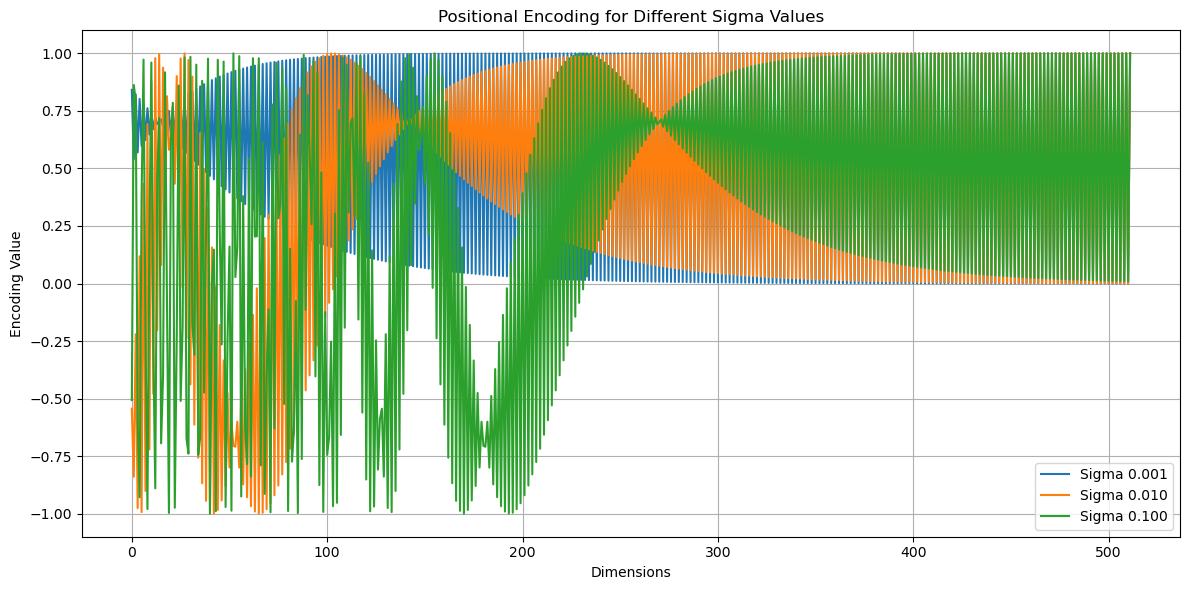

In [7]:
# Plotting the positional encodings
plt.figure(figsize=(12, 6))

# Plot each sigma's positional encoding
for i in range(positional_encodings.size(0)):
    plt.plot(positional_encodings[i].numpy()[:], label=f'Sigma {sigma_values[i].item():.3f}')

plt.title("Positional Encoding for Different Sigma Values")
plt.xlabel("Dimensions")
plt.ylabel("Encoding Value")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()